# Is equipment information relevant when it comes to Bycatch

- How can we see if equipments matter in predicting Bycatch?
- We can see the ratio of equipments used for most bycatches compared to the ratio of equipments for the dataset generally

In [1]:
import warnings # Got an irritating warning
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("H:\Informasjonsvitenskap\Programming\Python\Info-284\Info284_Project\Exam Task\Dataset\elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")

# Dataset where the species isn't the same as the main-species
bycatch = dataset[dataset['Art FAO'] != dataset['Hovedart FAO']]

<Axes: xlabel='Redskap FAO'>

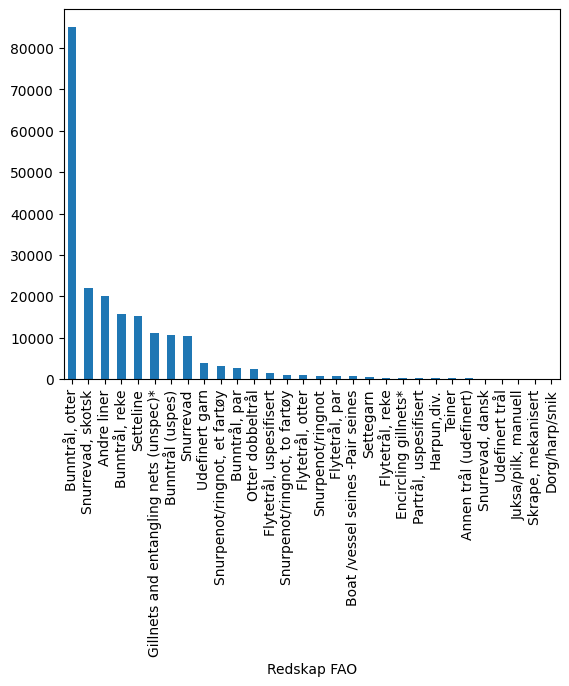

In [3]:
# A count of instances of equipment used for every Bycatch. 
count_of_equipment_used_for_only_Bycatch = bycatch.groupby(["Redskap FAO"])["Redskap FAO"].count()
count_of_equipment_used_for_only_Bycatch = count_of_equipment_used_for_only_Bycatch.sort_values(ascending=False)
count_of_equipment_used_for_only_Bycatch.plot(kind="bar")

<Axes: xlabel='Redskap FAO'>

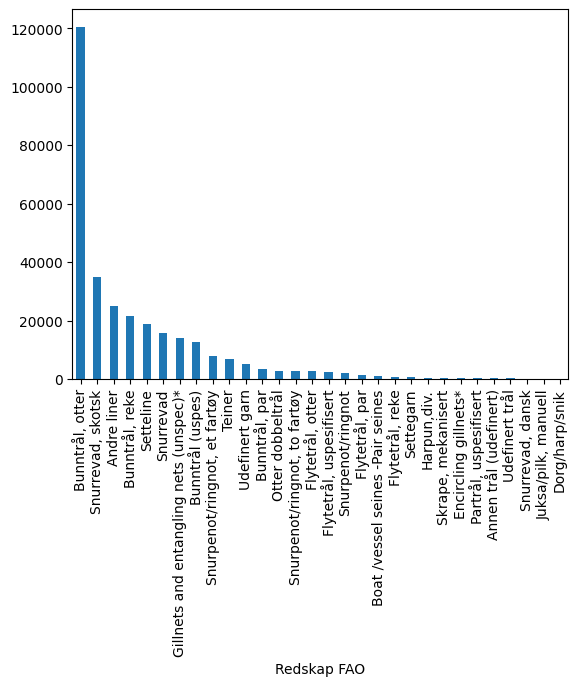

In [4]:
# A count of instances of equipment used for every species. 
count_of_equipment_used = dataset.groupby(["Redskap FAO"])["Redskap FAO"].count()
count_of_equipment_used = count_of_equipment_used.sort_values(ascending=False)
count_of_equipment_used.plot(kind="bar")

it appears that the equipment distribution is the same for Bycatches and the original dataset. 
lets see if there are any features that make equipment relevant when combined. 
perhaps we can check if there is a correlation between the most common bycatch species and the most common equipment for the top most common bycatch species

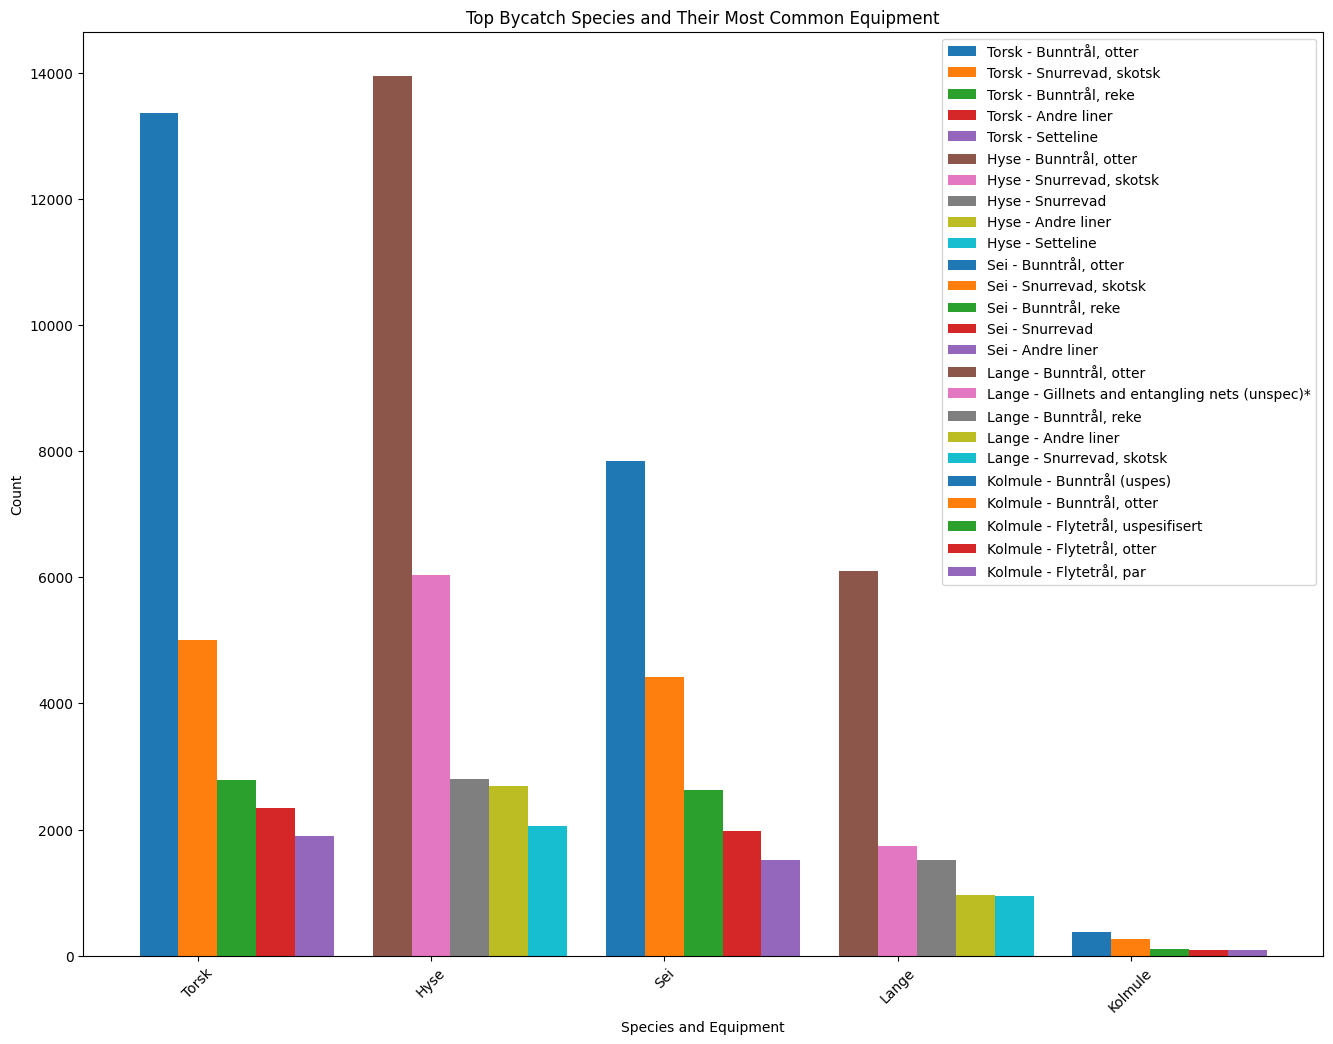

In [25]:

# Finding the most common bycatch, defined by Bycatch species with highest roundweight. 
count_of_Bycatches_for_every_main_species = bycatch.groupby(["Art FAO"])["Rundvekt"].sum()

# Top 5 species 
top_5_common_bycatch = (count_of_Bycatches_for_every_main_species.sort_values(ascending=False))[:5]
top_5_common_bycatch = list(top_5_common_bycatch.index)

fig, ax = plt.subplots(figsize=(16, 12)) 

positions = np.arange(len(top_5_common_bycatch))*3  
width = 0.5

# Finding the most common equipment used for catching each of these species
for i, species in enumerate(top_5_common_bycatch):
    species_only_dataset = bycatch[bycatch["Art FAO"] == species]
    count_of_equipment_used = species_only_dataset.groupby("Redskap FAO")["Redskap FAO"].count()
    top_equipment_for_species = count_of_equipment_used.sort_values(ascending=False).head(5) 
    
    for j, equipment in enumerate(top_equipment_for_species.index):
        ax.bar(positions[i] + j*width, top_equipment_for_species[equipment], width, label=f'{species} - {equipment}')

ax.set_xlabel('Species and Equipment')
ax.set_ylabel('Count')
ax.set_title('Top Bycatch Species and Their Most Common Equipment')

ax.set_xticks(positions + width)
ax.set_xticklabels(top_5_common_bycatch)

plt.legend()
plt.xticks(rotation=45)
plt.show()

Looks like there is a difference in the distribution of equipments used for catching each species, and they vary quite a lot from species to species. 